In [25]:
import matplotlib.pyplot as plt
import pandas as pd

from datetime import datetime


# Dia
# url = "http://api.bcb.gov.br/dados/serie/bcdata.sgs.11/dados?formato=csv"

# Mês
# url = "http://api.bcb.gov.br/dados/serie/bcdata.sgs.4390/dados?formato=csv"

# Ano
url = "http://api.bcb.gov.br/dados/serie/bcdata.sgs.1178/dados?formato=csv"

df = pd.read_csv(url, sep=";")
df.head()

,data,valor
0,04/06/1986,"17,80"
1,05/06/1986,"18,50"
2,06/06/1986,"18,31"
3,09/06/1986,"18,76"
4,10/06/1986,"18,40"


In [26]:
df.columns

Index(['data', 'valor'], dtype='object')

In [27]:
df['data'] = pd.to_datetime(df['data'], format='%d/%m/%Y')
df['valor'].replace([','], '.', regex=True, inplace=True)
df['valor'] = pd.to_numeric(df['valor'])
df.dtypes

data     datetime64[ns]
valor           float64
dtype: object

In [28]:
df['YEAR'] = pd.DatetimeIndex(df['data']).year
df.query("YEAR >= 2018", inplace=True)
df.head()

,data,valor,YEAR
7913,2018-01-02,6.9,2018
7914,2018-01-03,6.9,2018
7915,2018-01-04,6.9,2018
7916,2018-01-05,6.9,2018
7917,2018-01-08,6.9,2018


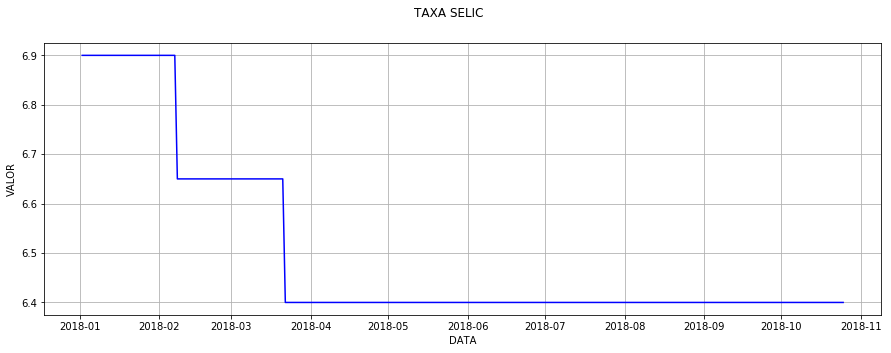

In [33]:
fig, ax = plt.subplots(figsize=(15, 5))
fig.suptitle("TAXA SELIC")

ax.plot(df['data'], df['valor'], 'b')
ax.set_xlabel('DATA')
ax.set_ylabel('VALOR')
ax.grid(True)

plt.show()